<a href="https://colab.research.google.com/github/kapilkukreja469/Retail_sales_pridiction/blob/main/Retail_sales_pridiction_Kapil_kukreja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Project Name**    - Retail Sales Pridiction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Submitted By**    -Kapil Kukreja


# **Project Summary -**



...........................Rossman Sales Prediction data contain historical sales data for a retail store chain. The data includes information about the store, such as Competitor’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day....................

In this project we have done the following:


*   Analysing the data for Null and Duplicate values and tackling them using different techniques
*   Merging dataframes
*   Handling Outliers and correcting the data types
* Exploratory Data Analysis (EDA)
* Hypothesis Testing between Categorical and Numerical variables
* Categorical Encoding
* Feature Manipulation
* Scaling the data using Standard Transform
* Splitting the data
* Training different models
* Pickled the best performing model for future use

At the end of this notebook, we have also presented our Conclusion

# **GitHub Link -**

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np                  #importing numpy library for working with arrays
import pandas as pd                 #importing pandas library for working with data sets
import matplotlib.pyplot as plt     #importing matplotlib library for creating static, animated, and interactive visualizations
import seaborn as sns               #importing seaborn library for creating statistical graphics in Python
import missingno as msno            # importing missingo library which helps us to visualize the missing values

### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive       #Mounting google drive to load csv data files stored in google drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
df_rossmann = pd.read_csv("/content/drive/MyDrive/Retail_sales_pridiction project/Rossmann Stores Data.csv")    #Creating dataframe for storing csv file
df_store = pd.read_csv("/content/drive/MyDrive/Retail_sales_pridiction project/store.csv")

<ipython-input-6-2077fdfb4b68>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rossmann = pd.read_csv("/content/drive/MyDrive/Retail_sales_pridiction project/Rossmann Stores Data.csv")    #Creating dataframe for storing csv file


### Dataset First View

In [7]:
# Dataset First Look
df_rossmann.head(10)      #First 10 records of rossmann data frame

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [8]:
df_rossmann.tail(10)      #Last 10 records of rossmann data frame

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [9]:
df_store.head(10)         #First 10 records of Store data frame

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [10]:
df_store.tail(10)        #Last 10 records of Store data frame

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
num_of_rows = df_rossmann.shape[0]                       # Rossmanns dataframe shape
print(f"Total {num_of_rows} Rows in Rossmanns dataframe")

num_of_columns = df_rossmann.shape[1]
print(f"Total {num_of_columns} Columns in Rossmanns dataframe \n")

num_of_rows = df_store.shape[0]                          # store dataframe shape
print(f"Total {num_of_rows} Rows in store dataframe")

num_of_columns = df_store.shape[1]
print(f"Total {num_of_columns} Columns in store dataframe")

Total 1017209 Rows in Rossmanns dataframe
Total 9 Columns in Rossmanns dataframe 

Total 1115 Rows in store dataframe
Total 10 Columns in store dataframe


### Dataset Information

In [12]:
df_rossmann.info()                # Rossmann Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


We can see Rossmann dataset contains 1017209 rows or observations and 9 columns. It appears to have no null values in it. It has integer, datetime and object as data types.

In [13]:
df_store.info()                  # store Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We can see store dataset contains 1115 rows and 10 columns, as we can see. It contains missing values, which must be imputed with appropriate values in order to produce good results later on.

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
num_of_dup_rows = df_rossmann.duplicated(["Store","Date"]).sum()           #duplicated() method used to find duplicate rows in table
print(f"No. of duplicate rows in rossmann dataset: {num_of_dup_rows}")

No. of duplicate rows in rossmann dataset: 0


In [15]:
num_of_dup_rows = df_store.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


We can see both datasets contain no duplicated values.

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df_rossmann.isnull().sum()            #isnull() method used to check null values in columns

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are missing values in the following columns -
* CompetitionDistance - Distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.
* CompetitionOpenSinceMonth - Gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.
* CompetitionOpenSinceYear - Gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring year.
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

                           missing_values_count
Store                                         0
StoreType                                     0
Assortment                                    0
CompetitionDistance                           3
CompetitionOpenSinceMonth                   354
CompetitionOpenSinceYear                    354
Promo2                                        0
Promo2SinceWeek                             544
Promo2SinceYear                             544
PromoInterval                               544


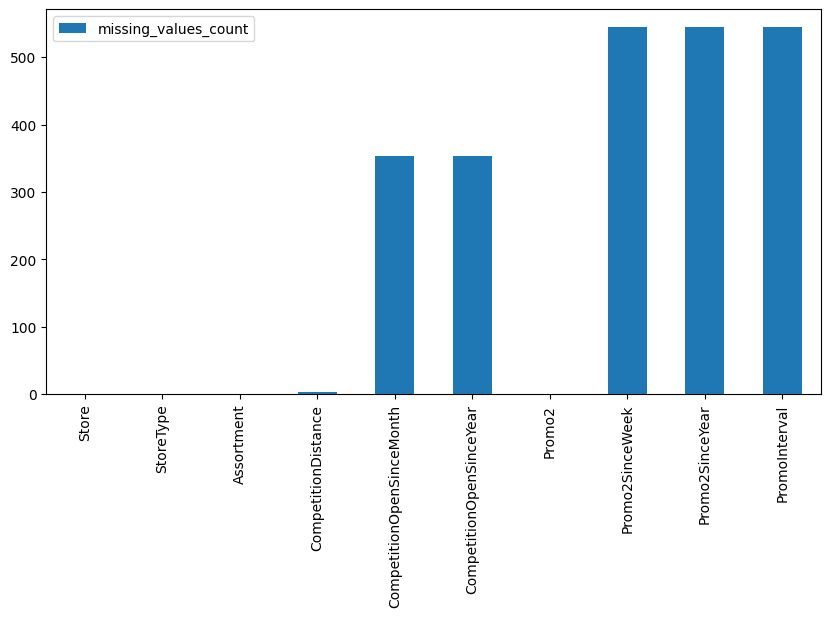

In [18]:
# Visualizing the missing values

# counting total value which are missing/NaN
missing_value_data=pd.DataFrame(df_store.isnull().sum(),columns=['missing_values_count'])

#creating Bar chart
plt.rcParams['figure.figsize'] = (10,5)
missing_value_data.plot(kind='bar')
print(missing_value_data)


In [19]:
missing_value_percentage = pd.DataFrame((missing_value_data/df_store.shape[0])*100)                 #Calculating percentage
missing_value_percentage["count"] = list(df_store.isnull().sum().values)                              #Adding count column
missing_value_percentage.rename(columns={'missing_values_count':"% of Null Values"},inplace=True)   #Renaming column name
missing_value_percentage.sort_values(by = ["count"],ascending= False)                               #Sorting data in decending order


,% of Null Values,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

Our dataset containing information from two datasets: Rossmann Store Sales and Store.

1.   Rossmann dataset contains 9 columns having information about daily sales data for 1115 stores in Germany from January 2013 to July 2015.
2.   Store dataset contains 10 columns having information about Competitior data like distance from compititor, compititor store opening  etc. for 1115 stores in Germany.
3.   Rossmann data don't have null values.
4.   Store dataset contains Six columns having missing values in them.


## ***2. Understanding Your Variables***

In [78]:
# Dataset Columns
print("Rosmann datasets columns:",list(df_rossmann.columns))
print("Store datasets columns:",list(df_store.columns))


Rosmann datasets columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Store datasets columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [79]:
# Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [80]:
# Store Dataset Describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.0
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,544.0
mean,558.00000,NaN,NaN,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462,NaN
std,322.01708,NaN,NaN,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,NaN
25%,279.50000,NaN,NaN,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000,NaN
75%,836.50000,NaN,NaN,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000,NaN


### Variables Description

**The dataset include following columns:**

Store: An integer indicating the store number.

DayOfWeek: An integer indicating the day of the week (1-7, where 1 is Sunday).

Date: The date in yyyy-mm-dd format.

Sales: The amount of sales for a given store on a given day (target variable).

Customers: The number of customers who visited the store on a given day.

Open: A binary variable indicating whether the store was open (1) or closed (0) on a given day.

Promo: A binary variable indicating whether a store was running a promotion on a given day.

StateHoliday: A categorical variable indicating whether a state holiday was in effect on a given day (0 = no, a = public holiday, b = Easter holiday, c = Christmas).

SchoolHoliday: A binary variable indicating whether a school holiday was in effect on a given day.

StoreType: A categorical variable indicating the type of store (a, b, c, d).

Assortment: A categorical variable indicating the type of assortment that the store carries (a = basic, b = extra, c = extended).

CompetitionDistance: Distance in meters to the nearest competitor store.

CompetitionOpenSinceMonth: The month of the year when the nearest competitor was first observed to be open.

CompetitionOpenSinceYear: The year when the nearest competitor was first observed to be open.

Promo2: A binary variable indicating whether a store was running a consecutive promotion (0 = no, 1 = consecutive promotion).

Promo2SinceWeek: The week of the year when the store started running consecutive promotions.

Promo2SinceYear: The year when the store started running consecutive promotions.

PromoInterval: A categorical variable indicating the consecutive promotion interval, i.e., the months the promotion runs, in the format "Jan,Apr,Jul,Oct".

### Check Unique Values for each variable.

In [81]:
# Check Unique Values for each variable.
df_rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [82]:
#unique values in df_store
df_store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           655
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                25
Promo2SinceYear                 8
PromoInterval                   4
dtype: int64

## 3. ***Data Wrangling***

**Null Values Treatment**

In [25]:
#checking rows with null values in CompetitionDistance column
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


CompetitionDistance column have 3 null values which is less then 1% of all data. So we decided to fill it with Median.

In [26]:
#filling the missing values of Competition Distance with median
df_store['CompetitionDistance'].fillna(value = int(df_store.CompetitionDistance.median()), inplace = True)

In [27]:
#rechecking the null values in CompetitionDistance
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [28]:
#checking rows with null values in CompetitionOpenSinceMonth column
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [29]:
#groupby() function is used on CompetitionOpenSinceYear column to check how many competitions are there in one year
df_store.groupby("CompetitionOpenSinceYear")["CompetitionOpenSinceYear"].count()

CompetitionOpenSinceYear
1900.0     1
1961.0     1
1990.0     5
1994.0     2
1995.0     2
1998.0     1
1999.0     8
2000.0    10
2001.0    16
2002.0    27
2003.0    19
2004.0    22
2005.0    62
2006.0    47
2007.0    48
2008.0    54
2009.0    54
2010.0    55
2011.0    54
2012.0    82
2013.0    83
2014.0    70
2015.0    38
Name: CompetitionOpenSinceYear, dtype: int64

In [30]:
#groupby() function is used on CompetitionOpenSinceMonth column to check how many competitions are there in one month
df_store.groupby("CompetitionOpenSinceMonth")["CompetitionOpenSinceMonth"].count()

CompetitionOpenSinceMonth
1.0      14
2.0      41
3.0      70
4.0      94
5.0      44
6.0      50
7.0      67
8.0      39
9.0     125
10.0     61
11.0     92
12.0     64
Name: CompetitionOpenSinceMonth, dtype: int64

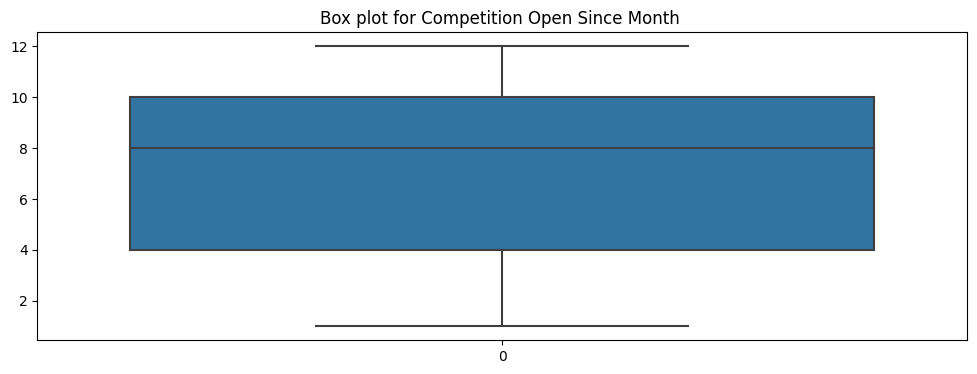

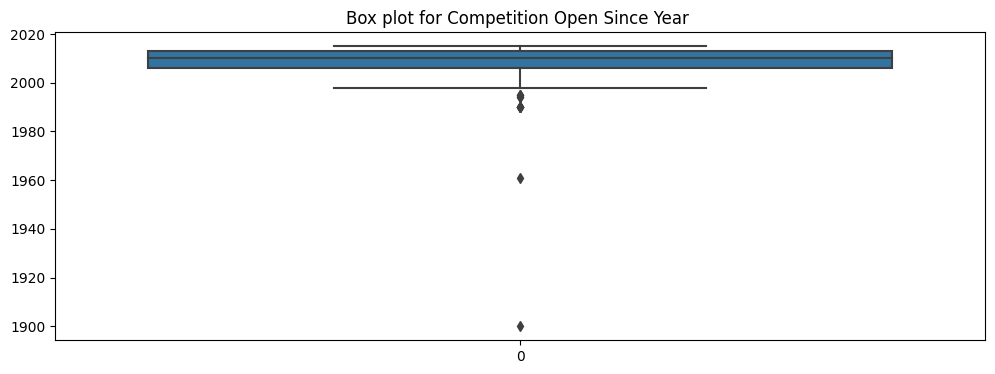

In [31]:
#plotting box plot for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
plt.figure(figsize=(12,4))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])
plt.title("Box plot for Competition Open Since Month ")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(df_store["CompetitionOpenSinceYear"])
plt.title("Box plot for Competition Open Since Year ")
plt.show()


In [32]:
#filling the missing values with mode (most frequent number)
df_store['CompetitionOpenSinceMonth'].fillna(value = df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(value = df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [33]:
#rechecking the null values in CompetitionOpenSinceMonth
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [34]:
#rechecking the null values in CompetitionOpenSinceYear
df_store[df_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [35]:
# filling the missing values with value 0 (Promo2SinceWeek, Promo2SinceYear and PromoInterval feature)
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [36]:
#Rechecking for null values
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now there are no missing values in the dataframe, hence we will proceed for further analysis.

**Merging datasets**

In [37]:
# merging two dataframes on store column using left join
merged_df= df_rossmann.merge(right=df_store,how="left",on="Store")
merged_df.shape

(1017209, 18)

 **Type Casting**

In [38]:
#checking the datatypes for the different columns in the Dataframe.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [39]:
# changing dtype into suitable format from both the datasets
merged_df["Date"]= pd.to_datetime(merged_df["Date"])
merged_df["CompetitionDistance"]= merged_df["CompetitionDistance"].astype(int)
merged_df["CompetitionOpenSinceMonth"]= merged_df["CompetitionOpenSinceMonth"].astype(int)
merged_df["CompetitionOpenSinceYear"]= merged_df["CompetitionOpenSinceYear"].astype(int)
merged_df["Promo2SinceWeek"]= merged_df["Promo2SinceWeek"].astype(int)
merged_df["Promo2SinceYear"]= merged_df["Promo2SinceYear"].astype(int)

In [40]:
#Rechecking the datatypes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [41]:
#Creating 5 new columns for Days, Weeks of the year , month and year for Date column
merged_df["Date"]=pd.to_datetime(merged_df["Date"])
merged_df["Year"]=merged_df["Date"].dt.year
merged_df["Month"]=merged_df["Date"].dt.month
merged_df["day"]=merged_df["Date"].dt.day
merged_df["WeekOfYear"]=merged_df["Date"].dt.weekofyear

<ipython-input-41-13cfa63c2644>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_df["WeekOfYear"]=merged_df["Date"].dt.weekofyear


In [42]:
print(merged_df.shape)
merged_df.info()

(1017209, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance    

### What all manipulations have you done and insights you found?

We have done Data Wrangling process in three steps:

* <b>Handling Missing Values</b>- We have observed that we have missing values in 6 columns of store Dataset.

  *   <b>CompetitionDistance </b>- In this column we replaced the missing values with Median (beacuse the data was positively skewed)
  *   <b>CompetitionOpenSinceMonth , CompetitionOpenSinceYear </b>- Missing values in these columns are replaced by their mode value.
  *  <b>Promo2SinceWeek , Promo2SinceYear , PromoInterval</b> - Missing values are replaced by zero

* <b> Merging Dataset</b> - We merged the two datasets using left join, and since there are no null values so the right join or inner join will also give us the same results.

* <b>Typecasting </b> - We have converted <b>Date</b> column to datetime and float variables to integer.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-  Daily Mean Sale of Stores

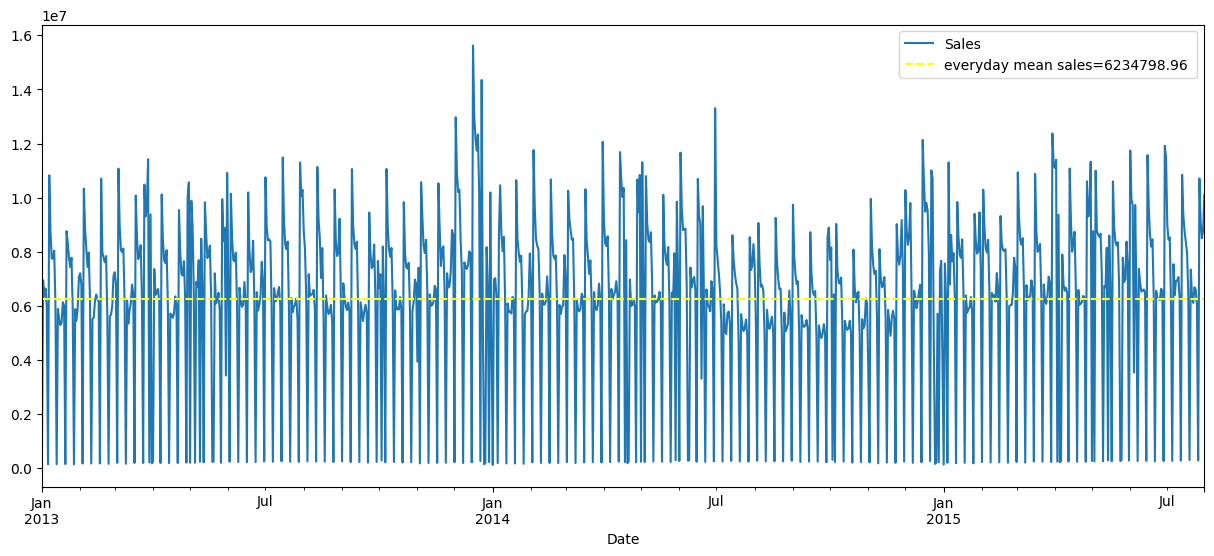

In [40]:
# Chart1 - visualization code

#Visualizing everyday sales with average everyday sales
plt.subplots(figsize=(15,6))

daily_sales=merged_df.groupby(["Date"]).Sales.sum()         #Grouping sum of daily sale Data
daily_sales.plot(kind="line")                               #Creating line chart
plt.axhline(y=daily_sales.mean(),label=f"everyday mean sales={round(daily_sales.mean(),2)} ",color="yellow", linestyle="--")         #Mean line code
plt.legend()


**1. Why did you pick the specific chart?**

Line Chart was choosen to analyse the total daily sales fluctuations on it because they are particularly effective in illustrating how data points change and evolve over time. Line charts are relatively simple and easy to interpret compared to other chart types. They provide a clear visual representation of data without excessive clutter or distractions, making them accessible to a wide range of viewers.

##### **2. What is/are the insight(s) found from the chart?**

Mean line shows everyday mean sale is 62,34,798.96/- that means 1115 Stores make this average sale. So average sale for 1 store will be Everyday meansale/1115 =5591.74/-

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason**.

From visual analysis, we can conclude that the sales are almost evenly distributed around the average sales which imples that overall daily sales have stabilised and new innovative steps need to be taken to increase the sales.

#### Chart - 2 Average Sales on different Days of week

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

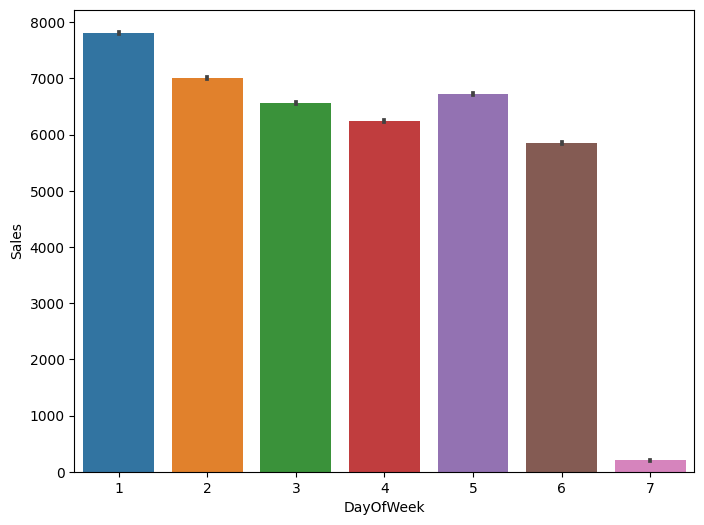

In [41]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize']=(8, 6)
sns.barplot(x=merged_df["DayOfWeek"],y=merged_df['Sales'])


In [113]:
weekly_sale=merged_df.groupby("DayOfWeek")["Sales","Open"].sum()
weekly_sale.rename(columns = {'Sales':'Total_Sales','Open':'Total_Open'}, inplace = True)
weekly_sale["Average_sales"]=(weekly_sale.Total_Sales/weekly_sale.Total_Open).round(2)
weekly_sale

<ipython-input-113-56df8a570c26>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_sale=merged_df.groupby("DayOfWeek")["Sales","Open"].sum()


,Total_Sales,Total_Open,Average_sales
DayOfWeek,,,
1,1130203012,137560,8216.07
2,1020411930,143961,7088.11
3,954962863,141936,6728.12
4,911177709,134644,6767.31
5,980555941,138640,7072.68
6,846317735,144058,5874.84
7,29551433,3593,8224.72


<Axes: xlabel='Open', ylabel='Sales'>

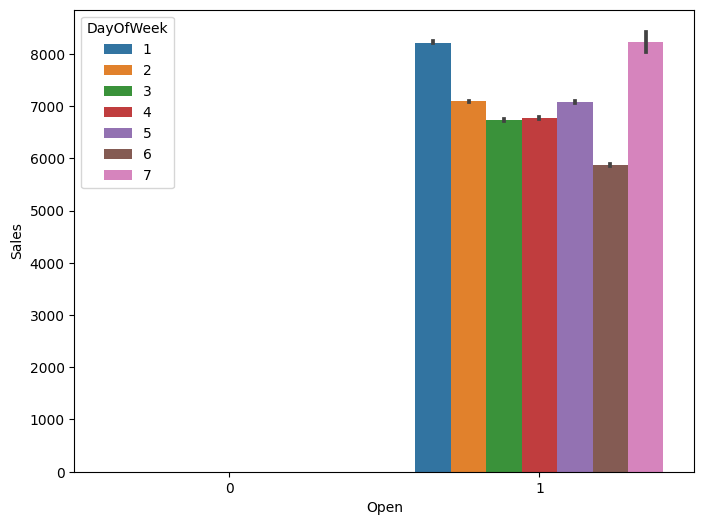

In [42]:
plt.rcParams['figure.figsize']=(8, 6)
sns.barplot(x=merged_df["Open"],y=merged_df["Sales"],hue=merged_df["DayOfWeek"])

**1. Why did you pick the specific chart?**

Barplots allow for a quick visual comparison between different categories or groups. Each category is displayed as a separate bar, making it easy to compare the values associated with each category where length of the bars directly corresponds to the values being compared, making it easy to identify the largest or smallest values


##### **2. What is/are the insight(s) found from the chart?**

In first chart we see average sale according to the day of the week on 7th day which is sunday we see average is very low. It's clear that the number of shops open on Sundays were very less and hence low sales. In second chart we see average Sales for open days which shows actually sales are higher on sundays and also some shops were closed on weekdays as well.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason**.

The gained insights can help to create a positive business impact by indicating that opening stores on Sundays can potentially lead to increased sales. It can also assist in determining when stores should be closed for refurbishment or holidays in order to minimise sales loss.

There are no insights that lead to negative growth. However, if the reason for the shops being closed on certain days is a lack of staff or other operational issues, it could potentially lead to negative growth if not addressed properly.

#### Chart - 3 Comparative Store Sales Analysis

          Sales
Store          
262    20718.52
817    18108.14
562    17969.56
1114   17200.20
251    15814.09
842    15242.11
513    15129.94
788    14949.19
733    14933.29
383    14320.47
756    13706.77
335    13313.94
698    12953.58
523    12925.68
595    12499.98
586    12465.39
320    12346.30
380    11955.07
544    11670.60
1033   11539.56


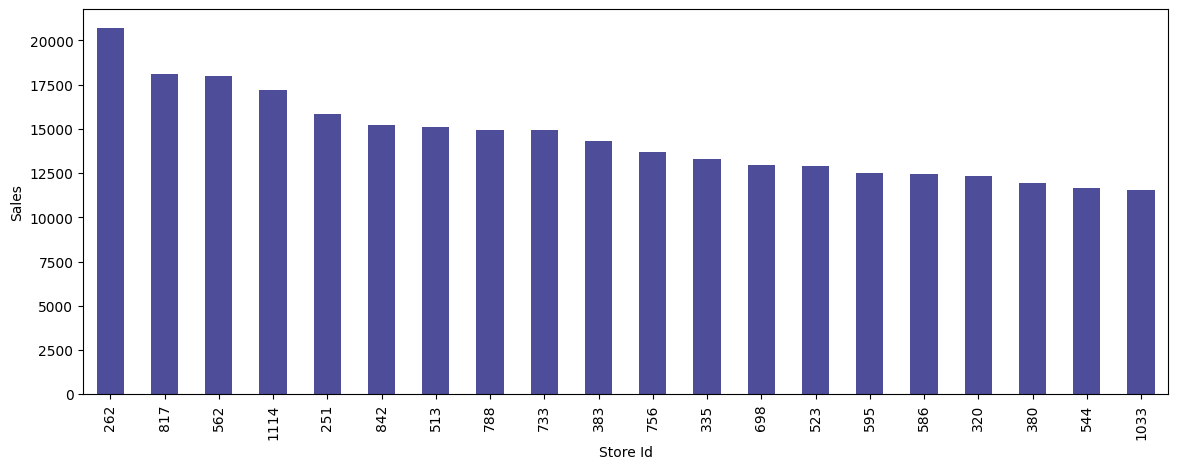

In [210]:
# Chart - 3 visualization code
# top 20 stores with highest average sales
plt.rcParams['figure.figsize'] = (14,5)
top20stores=pd.DataFrame(merged_df.groupby('Store')['Sales'].mean().sort_values(ascending=False))[:20].round(2)
print(top20stores)

# Creating bar plot chart
top20stores['Sales'].plot(kind = 'bar', color =[0.3,0.3,0.6])
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.show()

**1. Why did you pick the specific chart?**

For Visulization of Top 20 Stores sale we use barplots that allow a quick visual comparison between different categories or groups

##### **2. What is/are the insight(s) found from the chart?**

From first Vizualization chart we find that average sale of one store is approx 5591/- but Top 20 store Sales lies between 11000/- to 20000/-
Store 262 has the highest average sales of $20718/-

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason**.

Other stores could try implementing the model of Store Number 262 in daily operations or could also implement their assortment methods to witness increase in sales.



#### Chart - 4 Relationship between Store type, Assortment levels and Average Sales

       StoreType Assortment  Sales
508604         a          a   5951
761576         a          a      0
761578         a          c      0
761579         a          c      0
761580         a          a      0
761581         a          c      0
761582         a          c      0
761583         a          a      0
761584         a          a      0
401243         a          c   4471


<Axes: xlabel='StoreType', ylabel='Sales'>

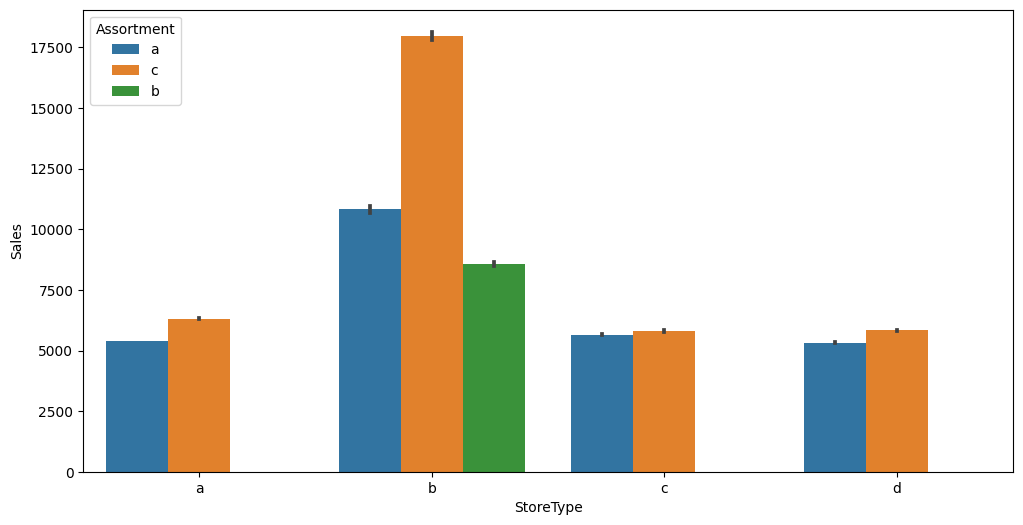

In [93]:
# Chart - 4 Visualization code
# Let's check the relationship between store type, assortment levels and Average sales
plt.rcParams['figure.figsize'] = (12, 6)
Store_type=pd.DataFrame(merged_df,columns=['StoreType','Assortment','Sales'])
Store_type.sort_values("StoreType", ascending=True, inplace = True)
print(Store_type.head(10))
sns.barplot(x=Store_type["StoreType"],y=Store_type['Sales'],hue=Store_type["Assortment"])

**1. Why did you pick the specific chart?**

Bar plots are simple and effective way to visualize the relationship between categorical features and the target variable in a prediction model and they provide valuable information that can be used to guide the modeling process.
Also here for visualising as per Assortment.

##### **2. What is/are the insight(s) found from the chart?**

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

**3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason**.

Yes, the gained insights can help create a positive business impact by understanding the relationship between store types and assortment levels, businesses can make informed decisions on how to stock and market their products to better meet the needs and preferences of their target customers. For example, if store type b stores have higher average sales, businesses may consider increasing the number of stores with that store type and assortment level to capitalize on the potential for higher sales.

There are no insights that directly lead to negative growth in this case. However, businesses may face challenges if they are unable to stock the appropriate assortment levels in their stores due to supply chain issues or other factors.

#### Chart - 5  Total Sales vs Store Type

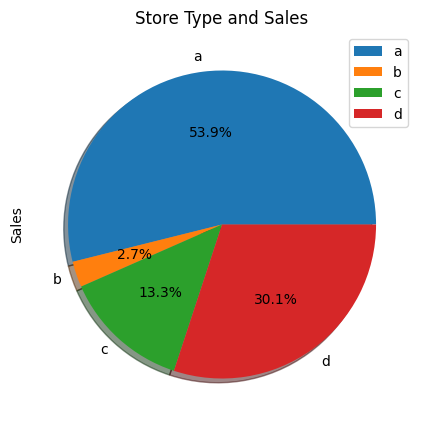

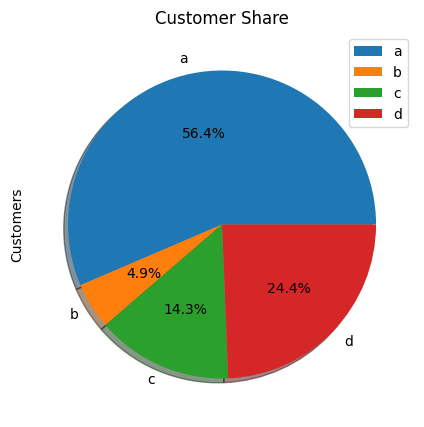

In [109]:
# Chart - 5 visualization code
# Let's explore Store Type a bit and it's influence on sales
plt.rcParams['figure.figsize'] = (8, 5)
merged_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

# Customers and store type
merged_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

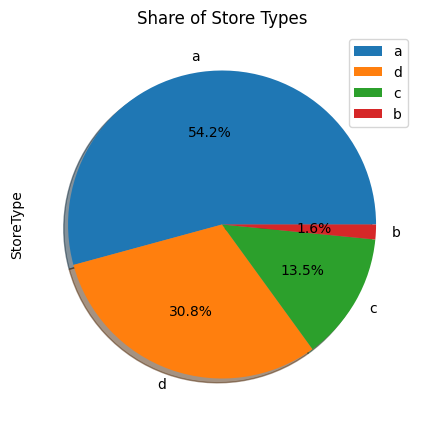

In [111]:
# Store types in all of the dataset
plt.rcParams['figure.figsize'] = (8, 5)
merged_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**1. Why did you pick the specific chart?**

Pie charts are used when the variable has a limited number of categories, and the goal is to show the proportion or percentage of observations that belong to each category. Pie charts are particularly useful when the number of categories is small, typically between 2 and 6, as they provide an easy-to-read representation of the distribution of the data.

##### **2. What is/are the insight(s) found from the chart?**

* Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason**.

The gained insights can help create a positive business impact as it provides valuable information about the sales and revenue generation of different store types and assortment strategies. This information can be used by the business to make informed decisions regarding their product offerings, marketing strategies, and store operations.

There are no signs that lead to negative growth.

#### Chart - 6 Mapping Out School Holidays

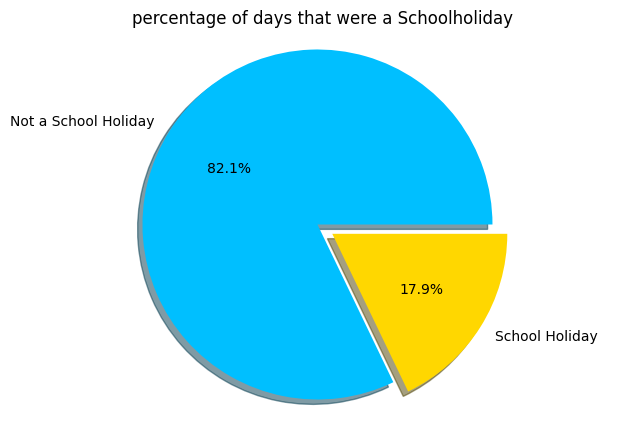

In [145]:
# Chart - 6 visualization code
labels = 'Not a School Holiday' , 'School Holiday'
sizes = merged_df.SchoolHoliday.value_counts()
colors = ['deepskyBlue', 'gold']
plt.pie(sizes, explode=(0.1, 0.0), labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("percentage of days that were a Schoolholiday ")
plt.show()

**1. Why did you pick the specific chart?**

 Pie charts can be visually appealing and engaging. The circular shape and the use of colors can make them visually striking, making it easier for viewers to understand and remember the information. we pick that chart to analyse the share of days that were school holidays.

##### **2. What is/are the insight(s) found from the chart?**

17.9% of the days are school holidays.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason**.

Since 17% of the days are school holidays, Rossman stores could use this as an opportunity to target parents and kids as an audience and try to advertise children friendly promotions to increase footfall in the stores on these days.

#### Chart - 7 Customers and Sales: A Visual Exploration of Business Growth

<Axes: xlabel='Customers', ylabel='Sales'>

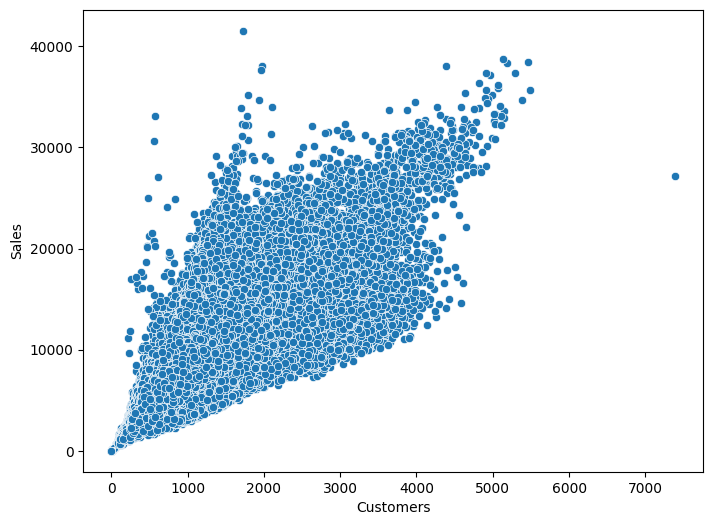

In [147]:
# Chart - 7 visualization code
# Scatter plot of Customers and Sales
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(x=merged_df['Customers'], y=merged_df['Sales'])

**1. Why did you pick the specific chart?**

 Scatter plots are a powerful tool for visualizing the relationship between two variables and it represents individual data points as dots on a graph, making it easier to visualize the distribution and spread of the data. This can be helpful in identifying outliers or clusters within the data set. We are particularly using it for exploring the relationship between sales and customers.

 By examining the pattern of the data points in a scatterplot, we  can gain valuable insights into the relationship between the two variables and identify trends, patterns, or outliers that may be important for understanding the business.





##### **2. What is/are the insight(s) found from the chart?**

scatter plot points form an upward sloping pattern and suggests a positive correlation and indicating that as the number of customers increases the sales also tend to increase.there are also some outliers that can provide valuable insights into factors and may influence sales.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason**.

 This indicates that increasing customer footfall can lead to higher sales, and the business can focus on customer retention and acquisition strategies.

Presence of outliers in the scatter plot suggests that there may be some stores that are not performing well in terms of converting customers into sales. Identifying and addressing the reasons for low sales in these stores can help prevent negative growth.


#### Chart - 8

In [49]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [50]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [51]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [52]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [53]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [54]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [55]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [56]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***